# Get coordinates of rat from Avisi Endpoint

- pip install requests
- pip install matplotlib

In [1]:
import requests
import json
import datetime
import time
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime as dt

In [2]:
class RatLocationResponse:
    x_position: float
    y_position: float
    timestamp: str
        
    def print_resp(self):
        print("x: " + str(self.x_position) + " y: " + str(self.y_position) + " timestamp: " + self.timestamp + " request made at: " + str(self.request_send_datetime))
    def to_json_string(self):
        return ('{ "x_position": ' + str(self.x_position) + ', "y_position": ' + str(self.y_position) + ', "timestamp": "' + self.timestamp + '" }')
        
    

def get_current_rat_location():
    response = requests.get('https://acc.avisilabs.nl/api/rat/position?secret=e41b0ea1-6693-403e-9b87-a2ebbc7284cb')
    
    if response.status_code != 200:
        print("Something went wrong while sending requests. Status code was: " + str(response.status_code))
    
    js_rs = response.json
    json_as_string = json.dumps(js_rs())
    json_obj = json.loads(json_as_string)
    return rat_response_to_object(json_obj)

def rat_response_to_object(rat_response):
    object_to_return = RatLocationResponse()
    
    object_to_return.x_position = rat_response['position']['x']
    object_to_return.y_position = rat_response['position']['y']
    object_to_return.timestamp = rat_response['timestamp']
    object_to_return.request_send_datetime = datetime.datetime.now()
    
    return object_to_return
    

# Get values each second for 2 minutes

In [3]:
def get_responses_in_2_minute_time_frame():
    results = []
    
    amount_of_seconds = 120
    current_second = 0
    
    do_loop = True
    while do_loop:
        rat_location = get_current_rat_location()
        results.append(rat_location)
        current_second += 1
        
        #print("current second: " + str(current_second))
        
        if current_second >= amount_of_seconds:
            do_loop = False
        
        time.sleep(1)
                   
    return results

def print_pretty_results(results_list):
    
    index = 0
    
    for result in results_list:
        print(str(index) + ": x= " + str(result.x_position) + " y=" + str(result.y_position) + "time=" + result.timestamp)
        index += 1

In [4]:
#res_list = get_responses_in_2_minute_time_frame()

In [5]:
print(res_list[0].print_resp())

NameError: name 'res_list' is not defined

In [ ]:
print_pretty_results(res_list)

# Functional pattern

- 14:57:00 x= 237.0045854 y=424.0091707
- 14:57:01 x= 236.7824481 y=423.5648961
- 14:57:02 x= 236.7824481 y=423.5648961
- 14:57:03 x= 236.6664793 y=423.3329587
- 14:57:04 x= 236.5549003 y=423.1098005

In [7]:
# Turn Avisi Datetime string to python DateTime object
def avisi_str_to_datetime(avisi_str):
    dt_pattern = pattern = '%Y-%m-%dT%H:%M:%S.%fZ' # pattern of how api passes date times. The Z at the end indicates UTC time
    return datetime.datetime.strptime(avisi_str, dt_pattern)

# express date time as a floating number
def datetime_to_float(d):
    return d.timestamp()

# testing date time converter
#skrt = avisi_str_to_datetime("2022-11-19T14:56:36.588155Z")
#print(skrt)

In [8]:
x_position_list = []

for coordinate in res_list:
    x_datetime_cords = []
    x_datetime_cords.append(avisi_str_to_datetime(coordinate.timestamp))
    x_datetime_cords.append(coordinate.x_position)
    x_position_list.append(x_datetime_cords)
    
y_position_list = []

for coordinate in res_list:
    y_datetime_cords = []
    y_datetime_cords.append(avisi_str_to_datetime(coordinate.timestamp))
    y_datetime_cords.append(coordinate.y_position)
    y_position_list.append(y_datetime_cords)

NameError: name 'res_list' is not defined

# X and Y seperate plotted based on timestamp and x/y

In [ ]:
#x, y = zip(*x_position_list)

plt.plot(*zip(*x_position_list))
plt.title('x_position with time stamp plotted')

plt.plot(*zip(*y_position_list))
plt.title('y_position with time stamp plotted')

In [ ]:
plt.plot(*zip(*x_position_list))
plt.title('x_position with time stamp plotted')

In [ ]:
plt.plot(*zip(*y_position_list))
plt.title('y_position with time stamp plotted')

# X and Y seperate plotted based on timestamp AS FLOAT and x/y

In [ ]:
x_position_list_as_floats = []

for coordinate in res_list:
    x_datetime_cords = []
    x_datetime_cords.append(datetime_to_float(avisi_str_to_datetime(coordinate.timestamp)))
    x_datetime_cords.append(coordinate.x_position)
    x_position_list_as_floats.append(x_datetime_cords)
    
y_position_list_as_floats = []

for coordinate in res_list:
    y_datetime_cords = []
    y_datetime_cords.append(datetime_to_float(avisi_str_to_datetime(coordinate.timestamp)))
    y_datetime_cords.append(coordinate.y_position)
    y_position_list_as_floats.append(y_datetime_cords)

In [6]:
print(datetime_to_float(avisi_str_to_datetime("2022-11-19T14:56:36.588155Z")))
print(datetime_to_float(avisi_str_to_datetime("2022-11-19T14:56:37.588155Z")))
print(datetime_to_float(avisi_str_to_datetime("2022-11-19T14:56:38.588155Z")))

NameError: name 'datetime_to_float' is not defined

Text(0.5, 1.0, 'x_position with time stamp plotted')

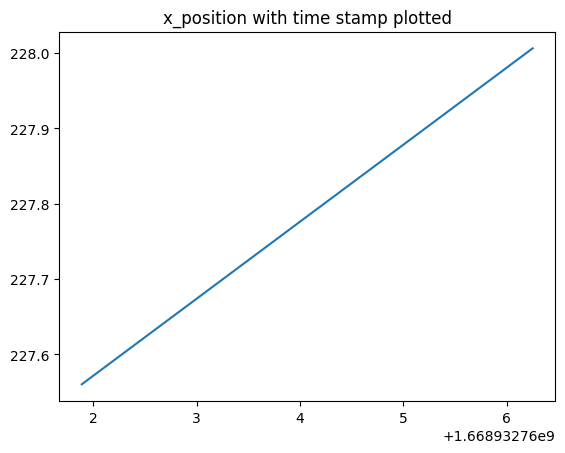

In [75]:
plt.plot(*zip(*x_position_list_as_floats[0:5]))
plt.title('x_position with time stamp plotted')

In [76]:
print(x_position_list_as_floats[1])

[1668932762.97558, 227.6714505]


# get results for 14 hours

In [80]:
def write_rate_location_to_csv(rat_location_obj):
    with open('rat_locations.txt', 'a') as hs:
        hs.write(rat_location_obj.to_json_string())
        hs.write("\n")

In [81]:
SECONDS_IN_A_HOUR = 60*60 # each second a request will be made, !so one second = one line!

def get_results_for_x_hours_and_write_to_csv(x_hours):
    n_lines = SECONDS_IN_A_HOUR*x_hours
    print("Doing loop for " + str(x_hours) + " hours. +- " + str(n_lines*2) + " lines will be written to the file")
    
    time_to_stop = dt.datetime.now() + timedelta(hours=x_hours)
    
    do_loop = True
    while do_loop:
        rat_location = get_current_rat_location()
        write_rate_location_to_csv(rat_location)
        if dt.datetime.now() >= time_to_stop:
            do_loop = False
        
        time.sleep(0.5)

In [83]:
get_results_for_x_hours_and_write_to_csv(20)

Doing loop for 20 hours. +- 144000 lines will be written to the file


KeyboardInterrupt: 

In [ ]:
while True:
    try:
        get_results_for_x_hours_and_write_to_csv(20)
    except:
        get_results_for_x_hours_and_write_to_csv(20)

Doing loop for 20 hours. +- 144000 lines will be written to the file
Doing loop for 20 hours. +- 144000 lines will be written to the file


# Get data from rat_locations.txt

In [10]:
def get_rat_locations():
    with open('./rat_locations.txt') as f:
        return f.readlines()

In [16]:
lines = get_rat_locations()
for line in lines[0:10]:
    print(line)
    json_obj = json.loads(line)
    print(json_obj['timestamp'])

{ "x_position": 318.7027174, "y_position": 356.2972826, "timestamp": 2022-11-20T09:52:25.914988Z, "request_send_datetime": 2022-11-20 10:52:26.109782 }



JSONDecodeError: Expecting ',' delimiter: line 1 column 74 (char 73)

In [48]:
# Fix lines in rat_locations files
with open('rat_locations_copy.txt', 'r') as file:
    data = file.readlines()
    
updated_lines = []
    
with open('updated_rat_values.txt', 'w') as file:
    for x in range(0, len(data)):

        splitted_line = data[x].split(',')
        splitted_line[2] = splitted_line[2].replace('"timestamp": ', '"timestamp": "')
        new_line = splitted_line[0] + "," + splitted_line[1] + "," + splitted_line[2] + '" }'

        file.write(new_line)
        file.write("\n")
    
    

In [53]:
# Put coordinates of the new big data to 2d array
big_data_x_coordinates = []

with open('updated_rat_values.txt', 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        coordinate = []
        json_line = json.loads(line)
        
        datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
        datetime_as_float = datetime_to_float(datetime_obj)
        
        coordinate.append(datetime_as_float)
        coordinate.append(json_line['x_position'])
        big_data_x_coordinates.append(coordinate)

print(len(big_data_x_coordinates))

76304


In [59]:
big_data_x_coordinates_timestamps = []

for coord in big_data_x_coordinates:
    big_data_x_coordinates_timestamps.append(coord[0])


big_data_x_coordinates_xes = []
for coord in big_data_x_coordinates:
    big_data_x_coordinates_xes.append(coord[1])

In [63]:
print(big_data_x_coordinates_timestamps[70000])
print(big_data_x_coordinates_xes[70000])

1668976394.306026
91.5960803


Text(0.5, 1.0, 'x_position with time stamp plotted')

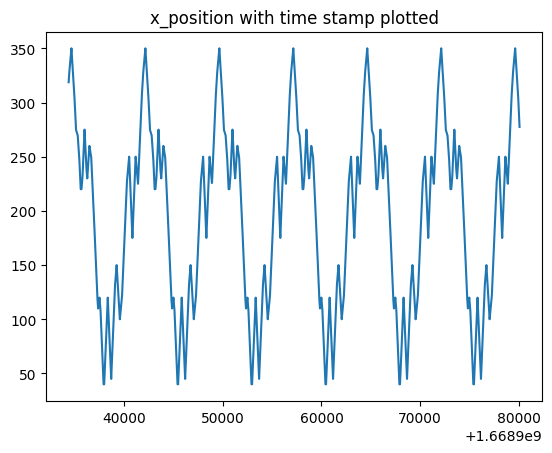

In [54]:
plt.plot(*zip(*big_data_x_coordinates))
plt.title('x_position with time stamp plotted')

In [66]:
# This should be the X value
import numpy as np
x = big_data_x_coordinates_timestamps
y = big_data_x_coordinates_xes
np.interp(1671933314.131211, x,y)

277.4840202

In [68]:
# 6 smallest points in list:
print(min(big_data_x_coordinates_xes))

40.0


In [67]:
# Answer

dt_obj = avisi_str_to_datetime("2022-12-25T16:15:14.131211Z")
float_number = datetime_to_float(dt_obj)

print(float_number)

1671981314.131211


# Plot 1 iteration

Text(0.5, 1.0, 'Single rat run loop for x_position')

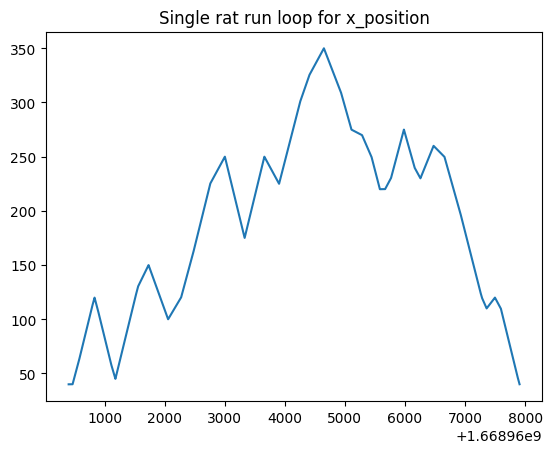

In [102]:
# Plot 1 iteration
# Put coordinates of the new big data to 2d array
def get_data_x_position_coordinates_by_file_name(file_name):
    big_data_x_coordinates = []

    with open(file_name, 'r') as file:
        lines = file.readlines()

        for line in lines:
            coordinate = []
            json_line = json.loads(line)

            datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
            datetime_as_float = datetime_to_float(datetime_obj)

            coordinate.append(datetime_as_float)
            coordinate.append(json_line['x_position'])
            big_data_x_coordinates.append(coordinate)

    return big_data_x_coordinates

def get_data_y_position_by_file_name(file_name):
    big_data_x_coordinates = []

    with open(file_name, 'r') as file:
        lines = file.readlines()

        for line in lines:
            coordinate = []
            json_line = json.loads(line)

            datetime_obj = avisi_str_to_datetime(json_line['timestamp'])
            datetime_as_float = datetime_to_float(datetime_obj)

            coordinate.append(datetime_as_float)
            coordinate.append(json_line['y_position'])
            big_data_x_coordinates.append(coordinate)

    return big_data_x_coordinates

single_run_x_data = get_data_x_position_by_file_name("./one_rat_loop.txt")

plt.plot(*zip(*single_run_x_data))
plt.title('Single rat run loop for x_position')

In [106]:
single_run_x_data = get_data_x_position_by_file_name("./one_rat_loop.txt")

start_point = single_run_x_data[0]
end_point = single_run_x_data[len(single_run_x_data)-1]

print(start_point) 
print(end_point)


# total length of one loop - represented as float
total_length_as_float = end_point[0] - start_point[0] #[0] is the time (and [1] is the x_position)

print("")
print("Total length: " + str(total_length_as_float))

[1668960401.834019, 40.0]
[1668967906.111562, 40.0650947]

Total length: 7504.277543067932


In [108]:
single_run_x_data_second_try = get_data_x_position_by_file_name("./one_rat_loop2.txt")

start_point2 = single_run_x_data_second_try[0]
end_point2 = single_run_x_data_second_try[len(single_run_x_data)-1]

print(start_point2) 
print(end_point2)


# total length of one loop - represented as float
total_length_as_float2 = end_point2[0] - start_point2[0] #[0] is the time (and [1] is the x_position)

print("")
print("Total length: " + str(total_length_as_float2))

[1668937886.507705, 40.0]
[1668945307.785279, 57.8673266]

Total length: 7421.277574062347


In [116]:
start_dt_object1 = datetime.datetime.fromtimestamp(1668960401.834019)
end_dt_object1 = datetime.datetime.fromtimestamp(1668960401.834019 + 7504.277543067932)
print("INFO FOR ITERRATION 1")
print("Begin: " + str(start_dt_object1))
print("End: " + str(end_dt_object1))
print("Total time: " + str(end_dt_object1 - start_dt_object1))

print("")

start_dt_object2 = datetime.datetime.fromtimestamp(1668937886.507705)
end_dt_object2 = datetime.datetime.fromtimestamp(1668937886.507705 + 7421.277574062347)
print("INFO FOR ITERRATION 2")
print("Begin: " + str(start_dt_object2))
print("End: " + str(end_dt_object2))
print("Total time: " + str(end_dt_object2 - start_dt_object2))

INFO FOR ITERRATION 1
Begin: 2022-11-20 17:06:41.834019
End: 2022-11-20 19:11:46.111562
Total time: 2:05:04.277543

INFO FOR ITERRATION 2
Begin: 2022-11-20 10:51:26.507705
End: 2022-11-20 12:55:07.785279
Total time: 2:03:41.277574


2:05:04.277543


In [107]:
y_full_data = get_data_y_position_by_file_name("updated_rat_values.txt")

Text(0.5, 1.0, 'x_position with time stamp plotted')

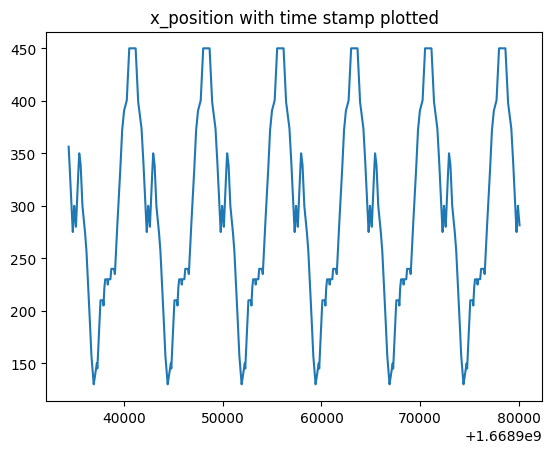

In [80]:
plt.plot(*zip(*y_full_data))
plt.title('x_position with time stamp plotted')

In [89]:
x = 2
eq = (-0.000025494*x**2) + (0.023386*x) + (3.71341)

print(eq)

3.760080024


In [101]:
x_axis_array = []
y_axis_array = []

for line in single_run_x_data:
    x_axis_array.append(line[0])
    y_axis_array.append(line[1])

x_axis = np.array(x_axis_array) # the time stamp
y_axis = np.array(y_axis_array) # the x_position

x=range(len(x_axis))

fig, ax = plt.subplots(1, 1)
ax.set_xticks(x) # set tick positions
# Labels are formated as integers:
ax.set_xticklabels(["{:d}".format(int(v)) for v in x_axis]) 
ax.plot(x, y_axis)  

fig.canvas.draw() # actually draw figure
plt.show() # enter GUI loop (for non-interactive interpreters)

KeyboardInterrupt: 

In [119]:
# Quadratic fit
import numpy as np
import matplotlib.pyplot as plt

points = np.array(single_run_x_data_second_try)
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 2)

print(z)




[ 4.12651915e-12  3.86541730e-08 -1.14937382e+07]


c:\users\niels\source\repos\avisi_coding_challenge_2022_nielsandchris\python\notebook-env-bb\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [117]:
print(single_run_x_data_second_try[1])


#LOOK AT THIS: # https://stackoverflow.com/questions/57446352/finding-the-equation-of-a-curve-of-a-numerical-curve

[1668937887.098017, 40.0]


c:\users\niels\source\repos\avisi_coding_challenge_2022_nielsandchris\python\notebook-env-bb\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


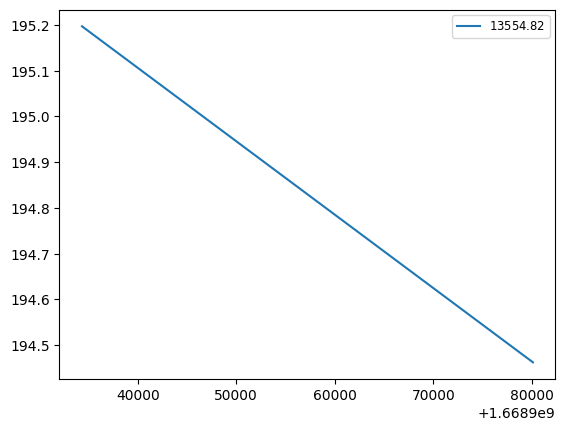

In [125]:
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import numpy as np

x=big_data_x_coordinates_timestamps
y=big_data_x_coordinates_xes

p = np.polyfit(x, y, 2)
f = np.poly1d(p)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

x = symbols("x")
poly = sum(S("{:6.2f}".format(v))*x**i for i, v in enumerate(p[::-1]))
eq_latex = printing.latex(poly)

plt.plot(x_new, y_new, label="${}$".format(eq_latex))
plt.legend(fontsize="small")
plt.show()